# Features Selection

### 1. RandomForest Selection

- --

step 01. 중요도 시각화

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [133]:
dataset = pd.read_csv('mushrooms.csv')

dataset_features = dataset.drop('class', axis=1)
dataset_target = dataset['class']

In [134]:
train_features, test_features, train_target, test_target = train_test_split(dataset_features, dataset_target, test_size=0.2, random_state=1)

In [135]:
train_features = pd.get_dummies(train_features)
test_features = pd.get_dummies(test_features)

print(train_features.shape, test_features.shape)

(6499, 117) (1625, 117)


In [136]:
model = RandomForestClassifier()
model.fit(train_features, train_target)

RandomForestClassifier()

<AxesSubplot:>

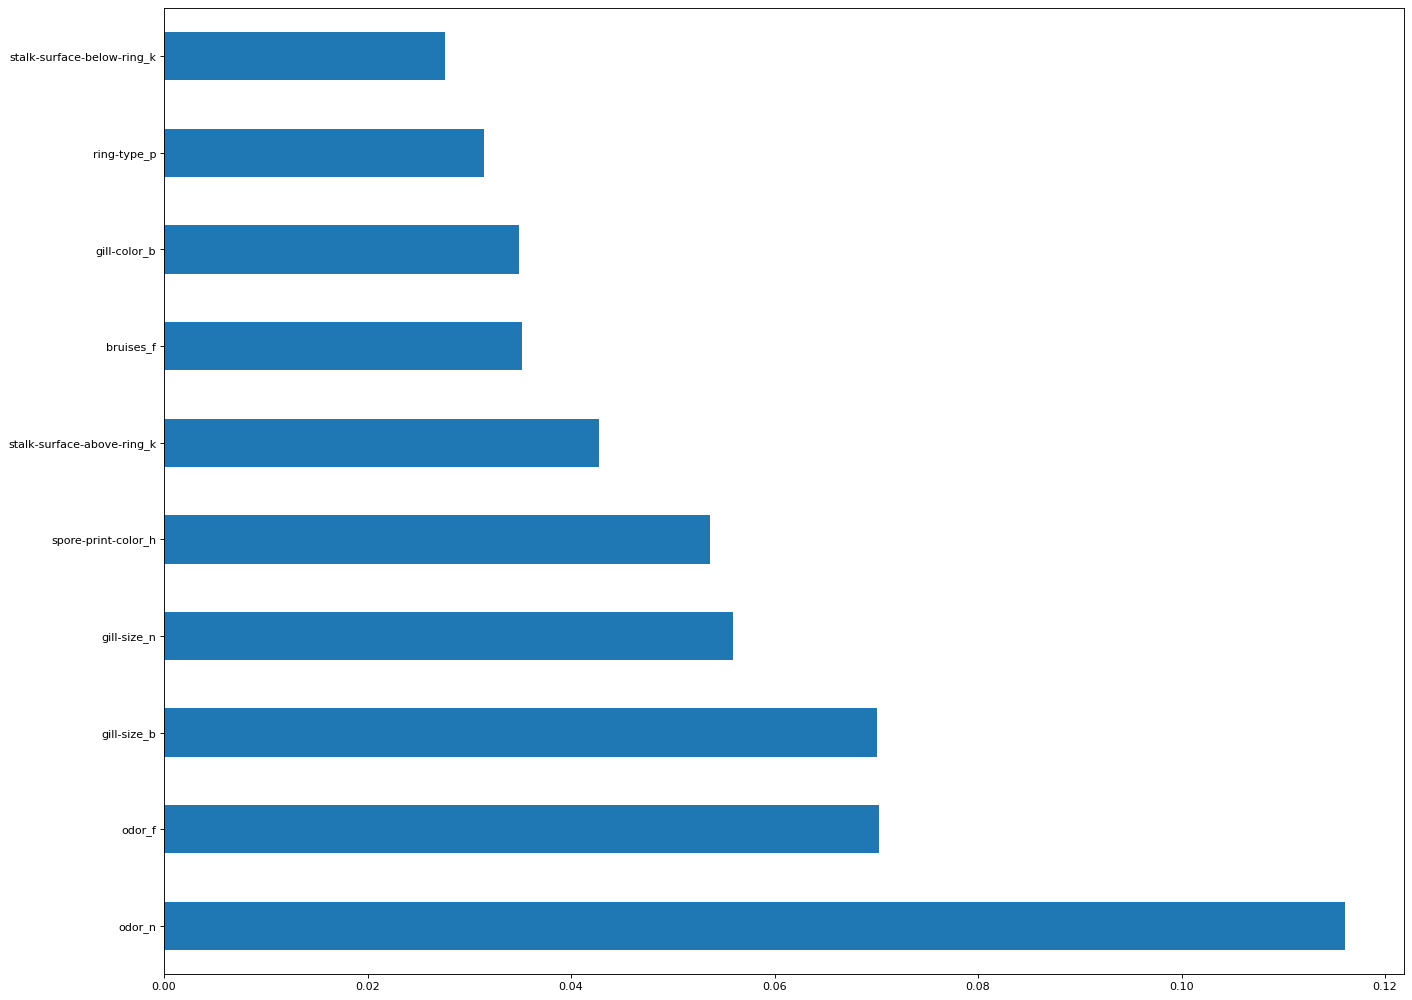

In [137]:
plt.figure(num=None, figsize=(20,16), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(model.feature_importances_, index= train_features.columns)

feat_importances.nlargest(10).plot(kind='barh')

- --

step 02. 실제 모델링에 활용

In [141]:
for i in range(1, 22):
    a = feat_importances.nlargest(i)

    New_train_features = train_features[a.index]

    model = RandomForestClassifier()
    model.fit(New_train_features, train_target)
    accuracy = model.score(New_train_features, train_target) * 100
    print("total number of feature %d : %f %%, 추가된 feature : %s" % (i, accuracy, a.index[i-1]))

total number of feature 1 : 88.844438 %, 추가된 feature : odor_n
total number of feature 2 : 88.844438 %, 추가된 feature : odor_f
total number of feature 3 : 96.845669 %, 추가된 feature : gill-size_b
total number of feature 4 : 96.845669 %, 추가된 feature : gill-size_n
total number of feature 5 : 96.845669 %, 추가된 feature : spore-print-color_h
total number of feature 6 : 97.676566 %, 추가된 feature : stalk-surface-above-ring_k
total number of feature 7 : 97.722727 %, 추가된 feature : bruises_f
total number of feature 8 : 97.722727 %, 추가된 feature : gill-color_b
total number of feature 9 : 97.722727 %, 추가된 feature : ring-type_p
total number of feature 10 : 97.722727 %, 추가된 feature : stalk-surface-below-ring_k
total number of feature 11 : 99.061394 %, 추가된 feature : gill-spacing_c
total number of feature 12 : 99.061394 %, 추가된 feature : bruises_t
total number of feature 13 : 99.061394 %, 추가된 feature : stalk-surface-above-ring_s
total number of feature 14 : 99.153716 %, 추가된 feature : population_v
total number 

### 주의

1. feature 의 중요도는 뽑힌 sample 에 따라 약간의 변화가 존재합니다. 중요도가 유사한 경우 중요도 순위가 바뀌는 feature 가 존재합니다. 

# features Selection

* features Selection 기준 : accuracy 를 높이는 features 를 채택했습니다. ex) total feature 2 > 3 으로 변화할 때  accuracy 가 증가했습니다. gill-size_b 선택
* exception : odor_n , odor_f <br> odor_n 은 most important feature 이기 때문에 1순위로 선택 <br> odor_f 는 accuracy 의 변화를 주지는 않았지만 경험적으로 높은 predict 을 가져다 주기에 채택했습니다.

In [148]:
New_train_features = train_features[['odor_n','odor_f','gill-size_b','stalk-surface-above-ring_k','bruises_f','gill-spacing_c','population_v','spore-print-color_k']]
New_test_features = test_features[['odor_n','odor_f','gill-size_b','stalk-surface-above-ring_k','bruises_f','gill-spacing_c','population_v','spore-print-color_k']]

def modeling(model):
    model.fit(New_train_features, train_target)
    prediction = model.predict(New_test_features)
    accuracy = cross_val_score(model, New_train_features, train_target, cv=5) * 100
    print(accuracy,"%")

    return prediction

In [149]:
RF_pred = modeling(RandomForestClassifier())

[99.38461538 99.         99.76923077 99.         98.61431871] %


In [149]:
RF_pred = modeling(RandomForestClassifier())

[99.38461538 99.         99.76923077 99.         98.61431871] %


In [150]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, RF_pred, labels=['e','p']) # 독버섯인데 독버섯이 아니라고 분류한 경우가 5개

array([[820,   0],
       [ 17, 788]], dtype=int64)

In [151]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, RF_pred, labels=['p','e'])

array([[788,  17],
       [  0, 820]], dtype=int64)

In [149]:
RF_pred = modeling(RandomForestClassifier())

[99.38461538 99.         99.76923077 99.         98.61431871] %


In [152]:
New_train_features = train_features[['odor_n','odor_f','gill-size_b','gill-size_n','bruises_f','spore-print-color_h','stalk-surface-above-ring_k','bruises_f']]
New_test_features = test_features[['odor_n','odor_f','gill-size_b','gill-size_n','bruises_f','spore-print-color_h','stalk-surface-above-ring_k','bruises_f']]

def modeling(model):
    model.fit(New_train_features, train_target)
    prediction = model.predict(New_test_features)
    accuracy = cross_val_score(model, New_train_features, train_target, cv=5) * 100
    print(accuracy,"%")

    return prediction

In [153]:
RF_pred = modeling(RandomForestClassifier()) # 중요도가 높은 순서대로 feature 를 8개를 선택해서 돌려본 결과 정확도는 더 낮게 나온 결과를 볼 수 있습니다.

[98.07692308 97.38461538 97.92307692 97.53846154 97.69053118] %


In [154]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, RF_pred, labels=['e','p']) 

array([[811,   9],
       [ 19, 786]], dtype=int64)

In [155]:
New_train_features = train_features[['odor_n','odor_f','gill-size_b','gill-size_n','bruises_f','spore-print-color_h','stalk-surface-above-ring_k','bruises_f','gill-color_b','ring-type_p']]
New_test_features = test_features[['odor_n','odor_f','gill-size_b','gill-size_n','bruises_f','spore-print-color_h','stalk-surface-above-ring_k','bruises_f','gill-color_b','ring-type_p']]

def modeling(model):
    model.fit(New_train_features, train_target)
    prediction = model.predict(New_test_features)
    accuracy = cross_val_score(model, New_train_features, train_target, cv=5) * 100
    print(accuracy,"%")

    return prediction

In [156]:
RF_pred = modeling(RandomForestClassifier()) # feature 2개를 더 추가해서 돌려보았습니다. 결과는 변함없습니다.

[98.07692308 97.38461538 97.92307692 97.53846154 97.69053118] %


In [157]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, RF_pred, labels=['e','p']) 

array([[811,   9],
       [ 19, 786]], dtype=int64)

# MY opinion

1. features 를 importance 기준으로 cutting 하는 것은 좋지 못한 결과를 가져올 수도 있다.
2. accuracy 가 증가시키는 feature 를 추가하는 것은 순전히 내가 선택한 방식이지 , 어디서 권장하고 있는 방식이 아니고 더 효과적이라고 단정지을 수 없다. <br> 왜냐하면 단순히 해당 feature 의 추가로 인한 성능 상승인지 , 여러개의 feature 가 추가되면서 상승시킨 것인지는 알 수 없다. <br> 그래도 경험적으로 봤을 때 상승을 가져오는건 맞다.